# BIG DATA & AI Bootcamp

### Machine Learning Track (2)
### Capstone Project
### FinTech startup data

### 3rd Notebook: ML Notebook

#### Team Name: Desert Ninjas
#### Team Members:
1. Reema Alaswad
2. Maha  Alhazzani
3. Aljohara Alkanhal
4. Raghad Aleisa
5. Eman Aldosari

***

#### Project Objective:
###### Predict customer behavior and activity logs to see if the customer would invest in the company or no. 

#### Dataset Description:


#### 🔹 3rd Notebook: ML Notebook🔹
1. Importing Packages
2. Dataset Loading
3. Feature Engineering
  - Label Enconding
  - Scaling
4. Oversampling 
5. Train models

5. Model Optimization - Hyperparameter Tuning
7. Model Pipeline

### 1. Importing Packages

In [ ]:
# Importing all necessary packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#Plot style
plt.style.use("seaborn-whitegrid")
plt.style.use("ggplot")
plt.style.use("seaborn")
%matplotlib inline
import time
import datetime

# Train Test split
from sklearn.model_selection import train_test_split

# Cost Functions

# For Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, recall_score, precision_score
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor

# The Explained Variance score is similar to the R^2 score, 
# with the notable difference that it does not account for systematic offsets in the prediction.
# Most often the R^2 score should be preferred.
from sklearn.metrics import explained_variance_score
# For classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Feature Engineering encoders
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder



# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier



from sklearn.metrics import roc_curve, roc_auc_score


from sklearn.model_selection import cross_val_score
# Hyperparameter
from sklearn.model_selection import GridSearchCV


# Confusion Matrix Plot
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Preprocessing
from sklearn.impute import SimpleImputer

# PCA for dimentionality Reduction
from sklearn.decomposition import PCA

# Trees
from sklearn import tree

# K means
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2. Dataset Loading

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Final_extracted_dataset.csv')
df.sample(15)

,Unnamed: 0,session_id,Type,window_id,browser,device_type,os,host,current_url,referrer,...,screen_width,viewport_height,viewport_width,min_time,max_time,duration_hours,duration_minutes,duration_seconds,total_pages,invest
976,976.0,1833623fd5923-0df6f32f9711a2-4f710037-448e0-18...,pageview,1833623fd5b183-052c52df6be1a2-4f710037-448e0-1...,Chrome,Mobile,Android,company.sa,https//company.sa/investor/opportunity/Vn15,direct,...,360.0,718.0,360.0,9:17:51,9:27:21,0.16,9.50,570.0,2.0,No
1078,1078.0,1833639278e3da-01e342677a2a308-1457d75-505c8-1...,pageleave,183363927901822-0fed7456df2413-1457d75-505c8-1...,Mobile Safari,Mobile,iOS,company.sa,https//company.sa/investor/opportunity/Vn15,https//company.sa/,...,390.0,661.0,390.0,9:40:58,9:40:58,0.00,0.00,0.0,1.0,No
1893,1893.0,18337dfd1731ef-0937992f3b7875-296e4f35-60c28-1...,pageleave,18337dfd175a3f-012dca197a5016-296e4f35-60c28-1...,Mobile Safari,Mobile,iOS,company.sa,https//company.sa/investor/investment-portfolio#,https//company.sa/investor/dashboard,...,428.0,746.0,428.0,17:22:38,17:22:38,0.00,0.00,0.0,1.0,No
1281,1281.0,183364f15fc7c9-099efb199261fe8-3f62684b-fa000-...,pageview,183364f15fe15fc-008b08298a7f7a8-3f62684b-fa000...,Safari,Desktop,Mac OS X,company.sa,https//company.sa/investor/profile#,direct,...,1280.0,672.0,1280.0,10:04:56,10:23:47,0.31,18.85,1131.0,48.0,No
2402,2402.0,1833c48ee7fc69-0a16768604aecd-2a6d4933-60c28-1...,pageview,1833c48ee81130d-09bdc583c21063-2a6d4933-60c28-...,Mobile Safari,Mobile,iOS,company.sa,https//company.sa/investor/transactions,https//company.sa/investor/investment-portfolio,...,428.0,746.0,428.0,13:55:56,14:01:41,0.10,5.75,345.0,31.0,No
1915,1915.0,183380381077ee-04072a158d1a678-7c7f3363-4a574-...,pageleave,18338038109d27-0c53920ee5c39a-7c7f3363-4a574-1...,Mobile Safari,Mobile,iOS,company.sa,https//company.sa/investor/investment-portfolio,direct,...,375.0,635.0,375.0,18:01:37,18:01:37,0.00,0.00,0.0,1.0,No
1639,1639.0,18336d956ff5fd-0790cc1438c773-26021c51-14efd7-...,pageview,18336d9570211df-0d6e468aa34ef7-26021c51-14efd7...,Chrome,Desktop,Windows,company.sa,https//company.sa/investor/opportunity/Vn18,direct,...,1561.0,689.0,1562.0,12:35:56,12:50:58,0.25,15.03,902.0,2.0,No
2903,2903.0,18341b64834576-04cf7eab401c6f8-2a6d4c36-5a900-...,autocapture,18341b64836a25-0dcdd664dbea83-2a6d4c36-5a900-1...,Mobile Safari,Mobile,iOS,company.sa,https//company.sa/investor/investment-portfolio,direct,...,414.0,829.0,414.0,15:13:54,15:13:54,0.00,0.00,0.0,1.0,No
604,604.0,183354590cb40d-07c318447e28c6-4a6a0437-448e0-1...,pageview,183354590cd62e-0cc19310b2b1c4-4a6a0437-448e0-1...,Chrome,Mobile,Android,company.sa,https//company.sa/investor/investment-portfolio#,https//company.sa/investor/dashboard,...,360.0,716.0,360.0,5:14:55,5:15:26,0.01,0.52,31.0,12.0,No
485,485.0,18332a0f6bf48b-070e705a73fb6c-1457d75-505c8-18...,pageview,18332a0f6c11c30-0e23cca84594538-1457d75-505c8-...,Mobile Safari,Mobile,iOS,company.sa,https//company.sa/investor/opportunity/VX18,direct,...,390.0,664.0,390.0,16:55:53,16:55:53,0.00,0.00,0.0,1.0,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2950 entries, 0 to 2949
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2949 non-null   float64
 1   session_id        2949 non-null   object 
 2   Type              2949 non-null   object 
 3   window_id         2949 non-null   object 
 4   browser           2949 non-null   object 
 5   device_type       2949 non-null   object 
 6   os                2949 non-null   object 
 7   host              2949 non-null   object 
 8   current_url       2949 non-null   object 
 9   referrer          2949 non-null   object 
 10  referring_domain  2949 non-null   object 
 11  pathname          2949 non-null   object 
 12  path1             2949 non-null   object 
 13  path2             2949 non-null   object 
 14  path3             2949 non-null   object 
 15  path4             2949 non-null   object 
 16  path5             2949 non-null   object 


In [ ]:
# 1. Removing ID's becuase they're unique and we dont need them 
# 2. keeping only the referrer domain since it has only four values instead of multiple possibilities 
#    removing current URL and pathname since they represent the same value
# 3. our dataset is based on one week only, thus, month, date, and year are not needed, we'll drop them 
#    day has the same value as day name but encoded so, we'll keep only one of them 
# 4. removing time because we have derived column (Duration in minutes), also duration in seconds and hours 
# 5. since we have the device type, we dont need ('screen_height','screen_width','viewport_height','viewport_width',)
# 6. removing host, becuse we only have three variations, and two of these variations have only 2 values per variation (doesnt contribute a lot to our analysis and we'll just create noise)
#    removing 'number_of_pages', 'path4','path5' --> data leakage

df.drop(['Unnamed: 0','session_id','window_id','host','referring_domain','browser_version','time',
        'year','date','month','month_name','screen_height','screen_width','viewport_height','viewport_width',
        'min_time','max_time','duration_hours','duration_seconds','pathname','current_url',
        'referrer','referring_domain', 'number_of_pages','path4' ,'path5'], inplace=True, axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2950 entries, 0 to 2949
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              2949 non-null   object 
 1   browser           2949 non-null   object 
 2   device_type       2949 non-null   object 
 3   os                2949 non-null   object 
 4   path1             2949 non-null   object 
 5   path2             2949 non-null   object 
 6   path3             2949 non-null   object 
 7   event_type        2949 non-null   object 
 8   day               2949 non-null   float64
 9   day_name          2949 non-null   object 
 10  week_label        2949 non-null   object 
 11  day_parts         2949 non-null   object 
 12  duration_minutes  2949 non-null   float64
 13  total_pages       2949 non-null   float64
 14  invest            2949 non-null   object 
dtypes: float64(3), object(12)
memory usage: 345.8+ KB


In [ ]:
# Since we have 12 culomn, it will be waste of time if i calculate the value counts for each one of them. 
# Instead, I used for loop the calculate the value counts for all the culomns in the dataframe.
print("Dataset columns' values and type:")
for x in df:
    print("–––––––––––––––––––––––––––––––––––––––––––––––––––––")
    print(f"Column ({x}) Value counts are:")
    print(df[x].value_counts())

Dataset columns' values and type:
–––––––––––––––––––––––––––––––––––––––––––––––––––––
Column (Type) Value counts are:
pageview       2536
pageleave       299
autocapture     114
Name: Type, dtype: int64
–––––––––––––––––––––––––––––––––––––––––––––––––––––
Column (browser) Value counts are:
Mobile Safari       1463
Chrome              1020
Chrome iOS           167
Samsung Internet      97
Safari                85
Microsoft Edge        74
Firefox               22
Android Mobile        21
Name: browser, dtype: int64
–––––––––––––––––––––––––––––––––––––––––––––––––––––
Column (device_type) Value counts are:
Mobile     2175
Desktop     767
Tablet        7
Name: device_type, dtype: int64
–––––––––––––––––––––––––––––––––––––––––––––––––––––
Column (os) Value counts are:
iOS          1630
Windows       575
Android       549
Mac OS X      185
Linux           9
Chrome OS       1
Name: os, dtype: int64
–––––––––––––––––––––––––––––––––––––––––––––––––––––
Column (path1) Value counts are:
inv

In [ ]:
df.describe(include=object).T

,count,unique,top,freq
Type,2949,3,pageview,2536
browser,2949,8,Mobile Safari,1463
device_type,2949,3,Mobile,2175
os,2949,6,iOS,1630
path1,2949,5,investor,2731
path2,2949,21,opportunity,1088
path3,2949,82,,882
event_type,2949,3,no action,2596
day_name,2949,7,Tuesday,1442
week_label,2949,2,Weekend,2140


In [ ]:
df.invest.value_counts(normalize = True)

# Baseline --> is Zero --> would be accurate by = 79%
# Whenever I build a model it needs to be more accurate than 79%

No       0.79315
Yes      0.16921
Maybe    0.03764
Name: invest, dtype: float64

### 3. Feature Engineering

In [ ]:
# Making a copy to keep original data in its form intact
df_enc = df.copy()

In [ ]:
#Ckedcing for NaN's 
df_enc.isnull().sum()

Type                1
browser             1
device_type         1
os                  1
path1               1
path2               1
path3               1
event_type          1
day                 1
day_name            1
week_label          1
day_parts           1
duration_minutes    1
total_pages         1
invest              1
dtype: int64

In [ ]:
#Dropping NaN's from the dataset
df_enc.dropna(inplace=True)

In [ ]:
#Double-check
df_enc.isnull().sum()

Type                0
browser             0
device_type         0
os                  0
path1               0
path2               0
path3               0
event_type          0
day                 0
day_name            0
week_label          0
day_parts           0
duration_minutes    0
total_pages         0
invest              0
dtype: int64

####  1. Label Enconding: 

In [ ]:
#Encode all of the categorical columns using "Label Encoder". 
columns = ['week_label', 'Type','browser', 'device_type', 'os', 'day_parts','event_type','day_name','path1', 'path2', 'path3']

le = LabelEncoder()
for column in columns:
    df_enc[column] = le.fit_transform(df_enc[column])

In [ ]:
#Mapping the terget column: invest into 3 possible numeric values:
#No --> 0, Yes --> 1, Maybe --> 2
df_enc['invest'] = df_enc['invest'].map({'No':0,'Yes':1,'Maybe':2})

In [ ]:
#Ckecking after the mapping process:
df_enc.invest.value_counts()

0    2339
1     499
2     111
Name: invest, dtype: int64

In [ ]:
#Check for all the encoded columns after the encoding process:
df_enc.head()

,Type,browser,device_type,os,path1,path2,path3,event_type,day,day_name,week_label,day_parts,duration_minutes,total_pages,invest
0,2,1,0,4,4,12,78,1,8.0,4,1,1,22.17,28.0,0
1,2,1,0,4,2,12,57,1,9.0,0,1,4,9.88,2.0,0
2,2,1,0,4,2,19,52,1,10.0,2,1,1,47.72,25.0,0
3,2,1,0,4,2,19,59,1,11.0,3,0,0,42.32,24.0,0
4,2,1,0,3,2,3,0,1,11.0,3,0,0,0.62,2.0,0


####  2. Scaling: 

In [ ]:
#Since we will use k-Nearest Neighbors and Support victor as classifier we need to scale the numric columns.
scaler = StandardScaler()
df_enc[['duration_minutes', 'total_pages','day','path2', 'path3']] = scaler.fit_transform(df_enc[['duration_minutes', 'total_pages','day', 'path2', 'path3']])

In [ ]:
#Ckecking after the scaling process:
df_enc

,Type,browser,device_type,os,path1,path2,path3,event_type,day,day_name,week_label,day_parts,duration_minutes,total_pages,invest
0,2,1,0,4,4,-0.280955,1.091332,1,-6.525833,4,1,1,0.481927,-0.093374,0
1,2,1,0,4,2,-0.280955,0.407722,1,-5.258068,0,1,4,-0.041710,-0.633868,0
2,2,1,0,4,2,1.298499,0.244958,1,-3.990302,2,1,1,1.570532,-0.155739,0
3,2,1,0,4,2,1.298499,0.472828,1,-2.722536,3,0,0,1.340455,-0.176527,0
4,2,1,0,3,2,-2.311682,-1.447791,1,-2.722536,3,0,0,-0.436250,-0.633868,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2944,0,1,1,0,2,-1.183501,-1.447791,0,2.348526,4,1,4,-0.459257,-0.613080,0
2945,0,5,1,5,2,1.298499,1.058779,0,2.348526,4,1,4,-0.342515,-0.259680,1
2946,0,2,1,5,2,0.170318,-1.447791,0,2.348526,4,1,4,-0.371913,-0.093374,0
2947,0,5,1,5,2,-1.183501,-1.447791,0,2.348526,4,1,4,-0.422190,-0.550715,0


### 3. Split data

In [ ]:
#Split the dataset: 

train, test = train_test_split(
    df_enc,
    test_size=0.2,
    train_size = 0.8,
    random_state=42
)

In [ ]:
#Feature selection:
#Feature set of X: Type, browser, device_type, os, event_type, day, day_name, week_label, day_parts, duration_minutes, total_pages.
#Target: invest.
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

In [ ]:
#Reshape the target.
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [ ]:
X_train.shape

(2359, 14)

In [ ]:
X_test.shape

(590, 14)

In [ ]:
y_train.shape

(2359, 1)

In [ ]:
y_test.shape

(590, 1)

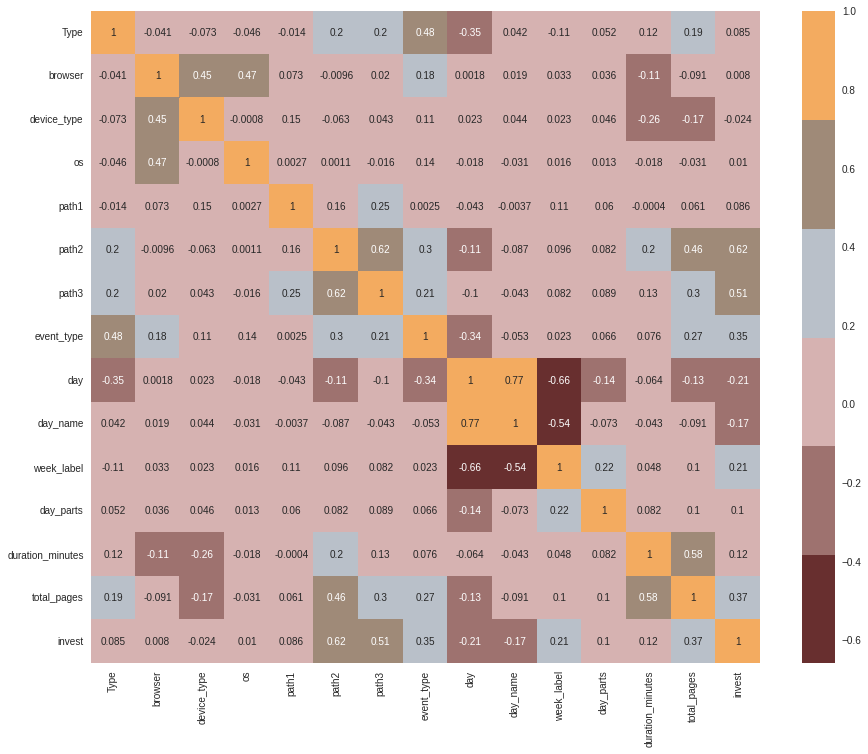

In [ ]:
#Examining correlation matrix using heatmap: 
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
cols = (["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
corrmat= df_enc.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,cmap=cols,annot=True)

### 4. Oversampling

In [ ]:
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(y_train==1)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(y_train==2)))


Before OverSampling, counts of label '0': [1892]
Before OverSampling, counts of label '1': [384] 

Before OverSampling, counts of label '2': [83] 



In [ ]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train==2)))

After OverSampling, the shape of train_X: (5676, 14)
After OverSampling, the shape of train_y: (5676,) 

After OverSampling, counts of label '0': 1892
After OverSampling, counts of label '1': 1892
After OverSampling, counts of label '2': 1892


### 5. Train models

### 1st Classification Model 

#### 1. Support Vector For Classification

1.   List item
2.   List item



In [ ]:
class_SVC = SVC(kernel = 'linear', random_state = 42)

class_SVC.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
val_train_SVC = round(class_SVC.score(X_train, y_train),2)*100
val_test_SVC = round(class_SVC.score(X_test, y_test),2)*100

#Pridected Y Class
preds_class_SVC = class_SVC.predict(X_test)

#Classification Report for RF Model
CL_SVC=classification_report(y_test, preds_class_SVC)

print(f'Training Accuracy: {val_train_SVC}%')
print(f'Test Set Accuracy: {val_test_SVC}%')

Training Accuracy: 78.0%
Test Set Accuracy: 90.0%


Confusion Matrix for Support Vector Machine Classification model:
  


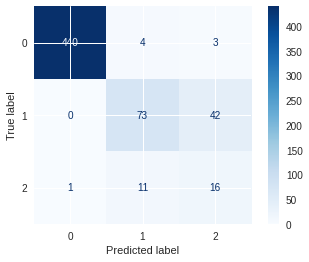

In [ ]:
# We can also make a simple confusion matrix
print("Confusion Matrix for Support Vector Machine Classification model:")
print("  ")
plot_confusion_matrix(class_SVC, X_test, y_test, cmap='Blues');

In [ ]:
print("Classification Report for Support Vector Machine Classification model:")
print("  ")
print(CL_SVC)

Classification Report for Support Vector Machine Classification model:
  
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       447
           1       0.83      0.63      0.72       115
           2       0.26      0.57      0.36        28

    accuracy                           0.90       590
   macro avg       0.70      0.73      0.69       590
weighted avg       0.93      0.90      0.91       590



### 2nd Classification Model 

#### 2. k-Nearest Neighbors For Classification


In [ ]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)


#acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
#print(acc_knn)

KNeighborsClassifier()

In [ ]:
val_train_KNN = round(KNN.score(X_train, y_train),2)*100
val_test_KNN = round(KNN.score(X_test, y_test),2)*100

#Pridected Y Class
preds_class_KNN = KNN.predict(X_test)

#Classification Report for RF Model
CL_KNN=classification_report(y_test, preds_class_KNN)

print(f'Training Accuracy: {val_train_KNN}%')
print(f'Test Set Accuracy: {val_test_KNN}%')

Training Accuracy: 94.0%
Test Set Accuracy: 86.0%


Confusion Matrix for k-Nearest Neighbors Classification model:
  


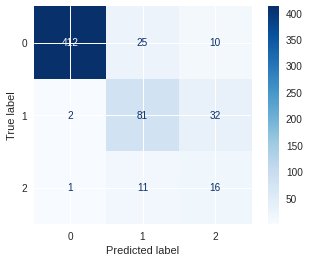

In [ ]:
# Model Evaluation:
# We can also make a simple confusion matrix
print("Confusion Matrix for k-Nearest Neighbors Classification model:")
print("  ")
plot_confusion_matrix(KNN, X_test, y_test, cmap='Blues');

In [ ]:
print("Classification Report for k-Nearest Neighbors Classification model:")
print("  ")
print(CL_KNN)

Classification Report for k-Nearest Neighbors Classification model:
  
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       447
           1       0.69      0.70      0.70       115
           2       0.28      0.57      0.37        28

    accuracy                           0.86       590
   macro avg       0.65      0.73      0.68       590
weighted avg       0.90      0.86      0.88       590



### 3rd Classification Model 

#### 3. Random Forest For Classification

In [ ]:
class_forest_RFC = RandomForestClassifier(n_estimators = 5, criterion = 'gini', random_state = 42)

class_forest_RFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [ ]:
val_train_RFC = round(class_forest_RFC.score(X_train, y_train),2)*100
val_test_RFC = round(class_forest_RFC.score(X_test, y_test),2)*100


#Pridected Y Class
preds_class_RFC = class_forest_RFC.predict(X_test)

#Classification Report for RF Model
CL_RFC=classification_report(y_test, preds_class_RFC)

print(f'Training Accuracy of Random Forest Classifier: {val_train_RFC}%')
print(f'Test Set Accuracy of Random Forest Classifier: {val_test_RFC}%')

Training Accuracy of Random Forest Classifier: 99.0%
Test Set Accuracy of Random Forest Classifier: 93.0%


Confusion Matrix for Random Forest Classification model:
  


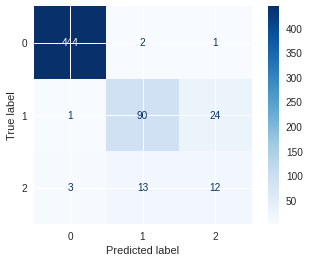

In [ ]:
# Model Evaluation:

print("Confusion Matrix for Random Forest Classification model:")
print("  ")
plot_confusion_matrix(class_forest_RFC, X_test, y_test, cmap='Blues');

In [ ]:
print("Classification Report for Random Forest Classification model:")
print("  ")
print(CL_RFC)

Classification Report for Random Forest Classification model:
  
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       447
           1       0.86      0.78      0.82       115
           2       0.32      0.43      0.37        28

    accuracy                           0.93       590
   macro avg       0.72      0.73      0.73       590
weighted avg       0.93      0.93      0.93       590



### 4th Classification Model 

#### 4. Decision Trees For Classification 


In [ ]:
class_tree_DTC = DecisionTreeClassifier(criterion='gini', max_depth=4)

class_tree_DTC.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
val_train_DTC = round(class_tree_DTC.score(X_train, y_train),2)*100
val_test_DTC = round(class_tree_DTC.score(X_test, y_test),2)*100


#Pridected Y Class
preds_class_DT = class_tree_DTC.predict(X_test)

#Classification Report for DTC Model
CL_DTC=classification_report(y_test, preds_class_DT)

print(f'Training Accuracy of Decision Tree Classifier: {val_train_DTC}%')
print(f'Test Set Accuracy of Decision Tree Classifier: {val_test_DTC}%')

Training Accuracy of Decision Tree Classifier: 76.0%
Test Set Accuracy of Decision Tree Classifier: 85.0%


Confusion Matrix for Decision Tree Classification model:
  


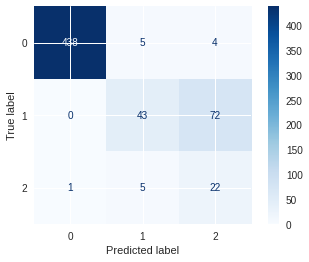

In [ ]:
# Model Evaluation:

print("Confusion Matrix for Decision Tree Classification model:")
print("  ")
plot_confusion_matrix(class_tree_DTC, X_test, y_test, cmap='Blues');

In [ ]:
print("Classification Report for Decision Tree Classification model:")
print("  ")
print(CL_DTC)

Classification Report for Decision Tree Classification model:
  
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       447
           1       0.81      0.37      0.51       115
           2       0.22      0.79      0.35        28

    accuracy                           0.85       590
   macro avg       0.68      0.71      0.62       590
weighted avg       0.92      0.85      0.87       590



### 5th Classification Model 

#### 5. Gradient Boosting For Classification


In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

GBK = GradientBoostingClassifier()
GBK.fit(X_train, y_train)
#y_pred = GBK.predict(x_val)
#acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
#print(acc_gbk)

GradientBoostingClassifier()

In [ ]:
val_train_GBK = round(GBK.score(X_train, y_train),2)*100
val_test_GBK = round(GBK.score(X_test, y_test),2)*100

#Pridected Y Class
preds_class_GBK = GBK.predict(X_test)

#Classification Report for RF Model
CL_GBK=classification_report(y_test, preds_class_GBK)

print(f'Training Accuracy: {val_train_GBK}%')
print(f'Test Set Accuracy: {val_test_GBK}%')

Training Accuracy: 90.0%
Test Set Accuracy: 92.0%


Confusion Matrix for Gradient Boosting Classification model:
  


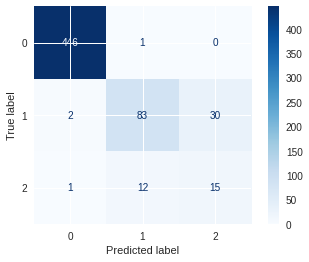

In [ ]:
# Model Evaluation:

print("Confusion Matrix for Gradient Boosting Classification model:")
print("  ")
plot_confusion_matrix(GBK, X_test, y_test, cmap='Blues');

In [ ]:
print("Classification Report for Gradient Boosting Classification model:")
print("  ")
print(CL_GBK)

Classification Report for Gradient Boosting Classification model:
  
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       447
           1       0.86      0.72      0.79       115
           2       0.33      0.54      0.41        28

    accuracy                           0.92       590
   macro avg       0.73      0.75      0.73       590
weighted avg       0.94      0.92      0.93       590



### 6th Classification Model 

#### 6. XGBoost for Classification

In [ ]:
classifierXGBC = XGBClassifier()
classifierXGBC.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
val_train_XGBC = round(classifierXGBC.score(X_train, y_train),2)*100
val_test_XGBC = round(classifierXGBC.score(X_test, y_test),2)*100

#Pridected Y Class
preds_class_XGBC = classifierXGBC.predict(X_test)

#Classification Report for RF Model
CL_XGBC=classification_report(y_test, preds_class_XGBC)

print(f'Training Accuracy of XGBoost Classifier: {val_train_XGBC}%')
print(f'Test Set Accuracy of XGBoost Classifier:  {val_test_XGBC}%')

Training Accuracy of XGBoost Classifier: 88.0%
Test Set Accuracy of XGBoost Classifier:  93.0%


Confusion Matrix for XGBoost Classification model:
  


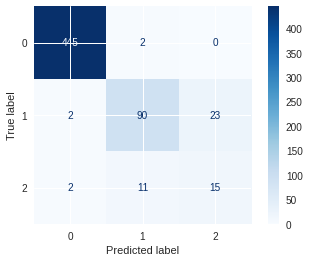

In [ ]:
# Model Evaluation:
print("Confusion Matrix for XGBoost Classification model:")
print("  ")
plot_confusion_matrix(classifierXGBC, X=X_test, y_true=y_test, cmap='Blues')

In [ ]:
print("Classification Report for XGBoost Classification model:")
print("  ")
print(CL_XGBC)

Classification Report for XGBoost Classification model:
  
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       447
           1       0.87      0.78      0.83       115
           2       0.39      0.54      0.45        28

    accuracy                           0.93       590
   macro avg       0.75      0.77      0.76       590
weighted avg       0.94      0.93      0.94       590



###**We chose to use XGBoost Model since it has the highest accuracy and Less False predection**

### 6. Model Optimization - Hyperparameter Tuning 

In [ ]:
# XGB
import xgboost as xgb

In [ ]:
# Classification

# Grid Search Parameters
grid_search_params = {
    'colsample_bytree': [0.3, 0.7],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'n_estimators': [100],
    'subsample': [0.2, 0.5, 0.8],
    'max_depth': [2, 3, 5]
}

xg_grid_c = xgb.XGBClassifier(objective = "multi:softmax") # we're doing multi-class classification


xgb_grid_2 = GridSearchCV( estimator = xg_grid_c,
                    param_grid = grid_search_params,
                    scoring = 'accuracy',
                    cv = 10, verbose = 1)

xgb_grid_2.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=XGBClassifier(objective='multi:softmax'),
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.01, 0.1, 0.2, 0.5],
                         'max_depth': [2, 3, 5], 'n_estimators': [100],
                         'subsample': [0.2, 0.5, 0.8]},
             scoring='accuracy', verbose=1)

### 7. Model Pipeline

In [ ]:
pipeline_rf = make_pipeline(
    StandardScaler(),
    XGBClassifier()
)

In [ ]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier', XGBClassifier(objective='multi:softprob'))])

In [ ]:
cv_score = cross_val_score(XGBClassifier(), X_train,y_train,scoring="neg_root_mean_squared_error", cv=12)
print(-1 * cv_score.mean())

0.3793449496170251
